Consider a neural network with N input units, N output units, and K hidden units. The activations are computed as follows:

$$
\mathbf{z} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
$$

$$
\mathbf{h} = \sigma (\mathbf{z})
$$


$$
\mathbf{y} = \mathbf{x} + \mathbf{W}^{(2)} \mathbf{h} + \mathbf{b}^{(2)}
$$

The cost will involve both h and y:

$$
\mathcal{E} = \mathcal{R} + \mathcal{S}
$$

$$
\mathcal{R} = \mathbf{r}^{T} \mathbf{h}
$$

$$
\mathcal{S} = \frac{1}{2} \lVert \mathbf{y} - \mathbf{s} \rVert^{2}
$$


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

### sub problem (1pts)

draw the computation graph

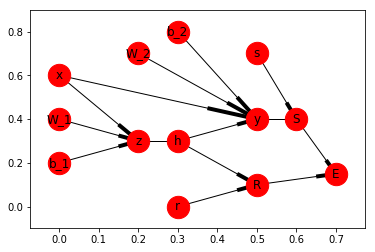

In [2]:
edges = [
    ('x', 'z'),
    ('W_1', 'z'),
    ('b_1', 'z'),
    ('z', 'h'),
    ('h', 'y'),
    ('h', 'R'),
    ('r', 'R'),
    ('x', 'y'),
    ('W_2', 'y'),
    ('b_2', 'y'),
    ('y', 'S'),
    ('s', 'S'),
    ('S', 'E'),
    ('R', 'E')
]

pos = {
    'x': np.array([ 0.,  0.6]),
    'W_1': np.array([ 0.,  0.4]),
    'b_1': np.array([ 0.,  0.2]),
    'z': np.array([ 0.2,  0.3]),
    'W_2': np.array([ 0.2,  0.7]),
    'b_2': np.array([ 0.3,  0.8]),
    'h': np.array([ 0.3,  0.3]),
    'r': np.array([ 0.3,  0.        ]),
    's': np.array([ 0.5,  0.7       ]),
    'y': np.array([ 0.5,  0.4]),
    'R': np.array([ 0.5,  0.1]),
    'S': np.array([ 0.6,  0.4]),
    'E': np.array([ 0.7,  0.15 ])
}

G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw_networkx_nodes(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

### sub problem (3 pts)

Derive the backprop equations for computing $\mathbf{\bar{x}}$.

#### notes
  * [how to](http://cs231n.github.io/optimization-2/#mat) compute gradients on expressions with matrix multiplication.
  * $*$ is pointwise multiplication.


$$
\mathcal{\bar{E}} = 1
$$

$$
\mathcal{\bar{S}} = 
\mathcal{\bar{E}} \frac{\partial \mathcal{E}}{\partial \mathcal{S}} =
\mathcal{\bar{E}}
$$

$$
\mathcal{\bar{R}} = 
\mathcal{\bar{E}} \frac{\partial \mathcal{E}}{\partial \mathcal{R}} =
\mathcal{\bar{E}}
$$

$$
\mathbf{\bar{y}} = 
\mathcal{\bar{S}} \frac{\partial \mathcal{S}}{\partial \mathbf{y}} =
\mathcal{\bar{S}} (\mathbf{y} - \mathbf{s})
$$

$$
\mathbf{\bar{h}}_{from \ \mathcal{R}} = 
\mathbf{r} \mathcal{\bar{R}}
$$

$$
\mathbf{\bar{h}}_{from \ \mathbf{y}} = 
\mathbf{\bar{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{h}} =
\mathbf{W}^{(2)T} \mathbf{\bar{y}}
$$

$$
\mathbf{\bar{h}} = 
\mathbf{\bar{h}}_{from \ \mathcal{R}} + 
\mathbf{\bar{h}}_{from \ \mathbf{y}} =
\mathbf{r} \mathcal{\bar{R}} +
\mathbf{W}^{(2)T} \mathbf{\bar{y}}
$$

$$
\mathbf{\bar{z}} = 
\mathbf{\bar{h}} \frac{\partial \mathbf{h}}{\partial \mathbf{z}} =
\mathbf{\bar{h}} * (1 - \mathbf{h}) * \mathbf{h}
$$

$$
\mathbf{\bar{x}}_{from \ \mathbf{y}} = 
\mathbf{\bar{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{x}} =
\mathbf{\bar{y}}
$$

$$
\mathbf{\bar{x}}_{from \ \mathbf{z}} = 
\mathbf{\bar{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{x}} =
\mathbf{W}^{(1)T} \mathbf{\bar{z}}
$$

$$
\mathbf{\bar{x}} =
\mathbf{\bar{x}}_{from \ \mathbf{y}} + 
\mathbf{\bar{x}}_{from \ \mathbf{z}} =
\mathbf{\bar{y}} + 
\mathbf{W}^{(1)T} \mathbf{\bar{z}}
$$

the full expression of the gradient is:

$$
\mathbf{\bar{x}} = 
(\mathbf{y} - \mathbf{s}) +
\mathbf{W}^{(1)T}[
    [
        \mathbf{r} + \mathbf{W}^{(2)T}(\mathbf{y}-\mathbf{s})
    ] 
    * (1 - \mathbf{h}) * \mathbf{h}
]
$$